## SVI EDA

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from functools import reduce

import datetime as dt
import math
import plotly.express as px

In [ ]:
# Read ACS data
df = pd.read_csv('acs_feature_data.csv')
df.head()

Unnamed: 0  reweighted_redline_index  total_pop  households  male_pop  \
0           0                  3.095023       20.0         5.0      11.0   
1           1                  2.086960     2548.0      1755.0    1329.0   
2           2                  1.000000     2331.0      1098.0    1071.0   
3           3                  2.158202     3950.0      1557.0    1850.0   
4           4                  3.000000     5568.0      1996.0    2747.0   

   female_pop  median_age  male_under_5  male_5_to_9  male_10_to_14  ...  \
0         9.0        13.8           0.0          6.0            0.0  ...   
1      1219.0        41.0          16.0         15.0            0.0  ...   
2      1260.0        38.5         147.0         84.0           52.0  ...   
3      2100.0        32.8         121.0         63.0          113.0  ...   
4      2821.0        43.1         115.0        180.0          154.0  ...   

   management_business_sci_arts_employed  sales_office_employed  \
0                                    0.0                    0.0   
1                                 1322.0                  316.0   
2                                  784.0                  284.0   
3                                  692.0                  562.0   
4                                  289.0                  463.0   

   in_grades_1_to_4  in_grades_5_to_8  in_grades_9_to_12  in_school  \
0               6.0               5.0                0.0       11.0   
1              30.0               7.0               16.0      250.0   
2             105.0              82.0               81.0      431.0   
3             237.0             243.0              268.0     1155.0   
4             344.0             277.0              532.0     1362.0   

   in_undergrad_college  speak_only_english_at_home  speak_spanish_at_home  \
0                   0.0                         NaN                    NaN   
1                 119.0                         NaN                    NaN   
2                  19.0                         NaN                    NaN   
3                 238.0                         NaN                    NaN   
4                  81.0                         NaN                    NaN   

   speak_spanish_at_home_low_english  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4                                NaN  

[5 rows x 242 columns]

In [ ]:
# Drop the extra column, "Unnamed: 0"
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Create 4 new SVI variables from ACS variables 
df['aged_65_or_older'] = df['female_65_to_66'] + df['female_67_to_69'] + df['female_70_to_74'] + df['female_75_to_79'] + df['female_80_to_84'] + df['female_85_and_over'] + df['male_65_to_66'] + df['male_67_to_69'] + df['male_70_to_74'] + df['male_75_to_79'] + df['male_80_to_84'] + df['male_85_and_over']
df['aged_17_or_younger'] = df['female_under_5'] + df['female_5_to_9'] + df['female_10_to_14'] + df['female_15_to_17'] + df['male_under_5'] + df['male_5_to_9'] + df['male_10_to_14'] + df['male_15_to_17']
df['multi_unit_structures'] = df['dwellings_3_to_4_units'] + df['dwellings_5_to_9_units'] + df['dwellings_10_to_19_units'] + df['dwellings_20_to_49_units'] + df['dwellings_50_or_more_units']

# Non-white
df['non_white'] = df['total_pop'] - df['white_pop']

In [ ]:
df['poverty_perc'] = df['poverty']/df['pop_determined_poverty_status']
df['unemployed_pop_perc'] = df['unemployed_pop'] / df['total_pop']
df['less_than_high_school_graduate_perc'] = df['less_than_high_school_graduate'] / df['total_pop']
df['aged_65_or_older_perc'] = df['aged_65_or_older'] / df['total_pop']
df['aged_17_or_younger_perc'] = df['aged_17_or_younger'] / df['total_pop']
df['one_parent_families_with_young_children_perc'] = df['one_parent_families_with_young_children'] / df['households']
df['non_white_perc'] = df['non_white'] / df['total_pop']
df['multi_unit_structures_perc'] = df['multi_unit_structures'] / df['housing_units']
df['mobile_homes_perc'] = df['mobile_homes'] / df['housing_units']
df['no_cars_perc'] = df['no_cars'] / df['households']
df['group_quarters_perc'] = df['group_quarters'] / df['total_pop']

### Select the required SVI variables to create new dataframes

In [ ]:
# All ACS variables selected based on SVI
df = df[['reweighted_redline_index','poverty_perc','unemployed_pop_perc','median_income', 'income_per_capita','less_than_high_school_graduate_perc','aged_65_or_older_perc','aged_17_or_younger_perc','one_parent_families_with_young_children_perc','non_white_perc','multi_unit_structures_perc','mobile_homes_perc','no_cars_perc','group_quarters_perc']]

### Subgrouping
# All ACS variables selected based on Socioeconomic Status
df_ses = df[['reweighted_redline_index','poverty_perc','unemployed_pop_perc','median_income', 'income_per_capita','less_than_high_school_graduate_perc']]

# All ACS variables selected based on SVI Household Composition & Disability
df_hh_composition_disability = df[['reweighted_redline_index','aged_65_or_older_perc','aged_17_or_younger_perc','one_parent_families_with_young_children_perc']]

# All ACS variables selected based on SVI Minority Status & Language
df_minority_status = df[['reweighted_redline_index','non_white_perc']]

# All ACS variables selected based on SVI Housing Type & Transportation
df_housing_transport = df[['reweighted_redline_index','multi_unit_structures_perc','mobile_homes_perc','no_cars_perc','group_quarters_perc']]

In [ ]:
df.describe()

reweighted_redline_index  poverty_perc  unemployed_pop_perc  \
count               6735.000000   6669.000000          6677.000000   
mean                   3.044066      0.190827             0.039678   
std                    0.765253      0.133561             0.025368   
min                    0.000259      0.000000             0.000000   
25%                    2.770951      0.084842             0.022456   
50%                    3.000000      0.161495             0.034466   
75%                    3.869844      0.268717             0.050742   
max                    4.858152      1.000000             0.254167   

       median_income  income_per_capita  less_than_high_school_graduate_perc  \
count    6639.000000        6669.000000                          6677.000000   
mean    65705.198223       35914.660519                             0.121954   
std     36917.570138       25747.896972                             0.087359   
min      8264.000000        2530.000000                             0.000000   
25%     39633.000000       18728.000000                             0.052818   
50%     57083.000000       27346.000000                             0.106236   
75%     82877.000000       43802.000000                             0.178964   
max    250001.000000      227064.000000                             1.000000   

       aged_65_or_older_perc  aged_17_or_younger_perc  \
count            6677.000000              6677.000000   
mean                0.132897                 0.211267   
std                 0.064942                 0.077670   
min                 0.000000                 0.000000   
25%                 0.089369                 0.164276   
50%                 0.123894                 0.212736   
75%                 0.166667                 0.260428   
max                 1.000000                 0.650677   

       one_parent_families_with_young_children_perc  non_white_perc  \
count                                   6663.000000     6677.000000   
mean                                       0.091128        0.662762   
std                                        0.094999        0.299749   
min                                        0.000000        0.000000   
25%                                        0.020575        0.389842   
50%                                        0.063688        0.739600   
75%                                        0.139019        0.952927   
max                                        2.500000        1.000000   

       multi_unit_structures_perc  mobile_homes_perc  no_cars_perc  \
count                 6666.000000        6666.000000   6663.000000   
mean                     0.464036           0.005220      0.264607   
std                      0.318534           0.026323      0.228374   
min                      0.000000           0.000000      0.000000   
25%                      0.171598           0.000000      0.081278   
50%                      0.431144           0.000000      0.186473   
75%                      0.748818           0.000000      0.400070   
max                      1.000000           0.880996      1.000000   

       group_quarters_perc  
count          6677.000000  
mean              0.023958  
std               0.088972  
min               0.000000  
25%               0.000000  
50%               0.001983  
75%               0.011472  
max               1.000000

### Pair Plots for All SVI Variables

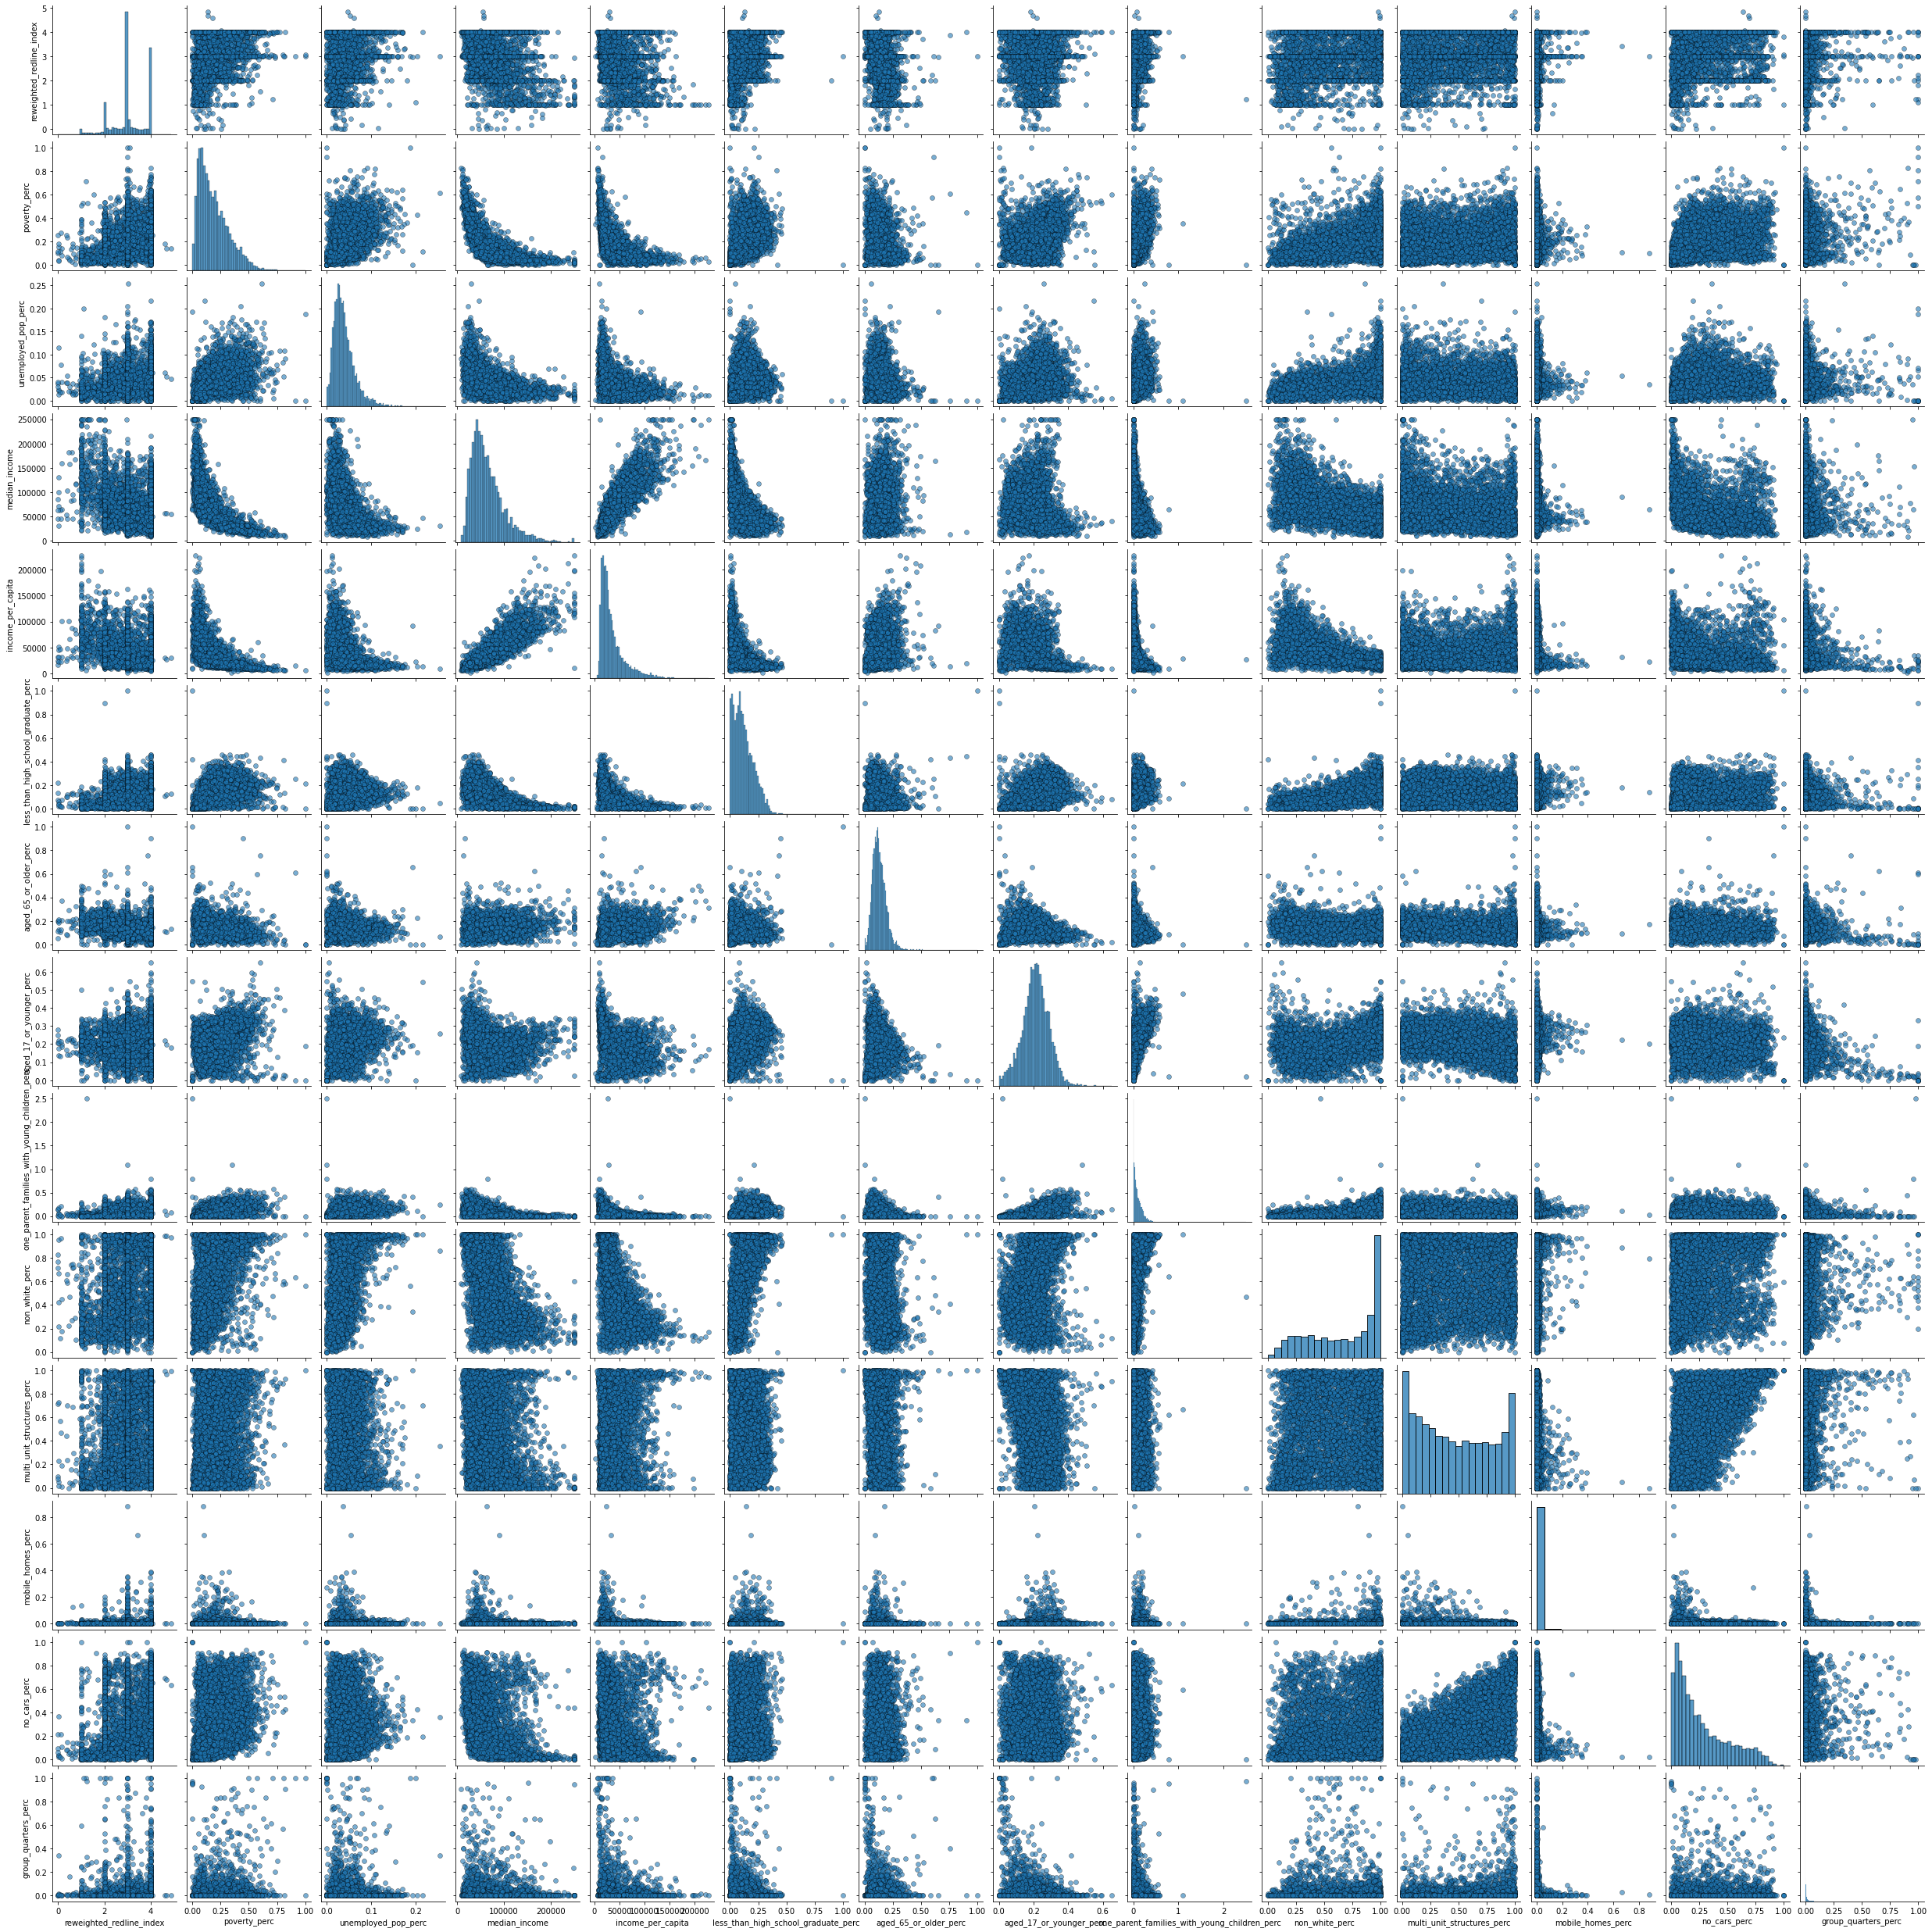

In [ ]:
sns.pairplot(df, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')
plt.savefig("pair-plot-all-svig.svg")

### Pair Plots for SVI Socioeconomic Status Variables

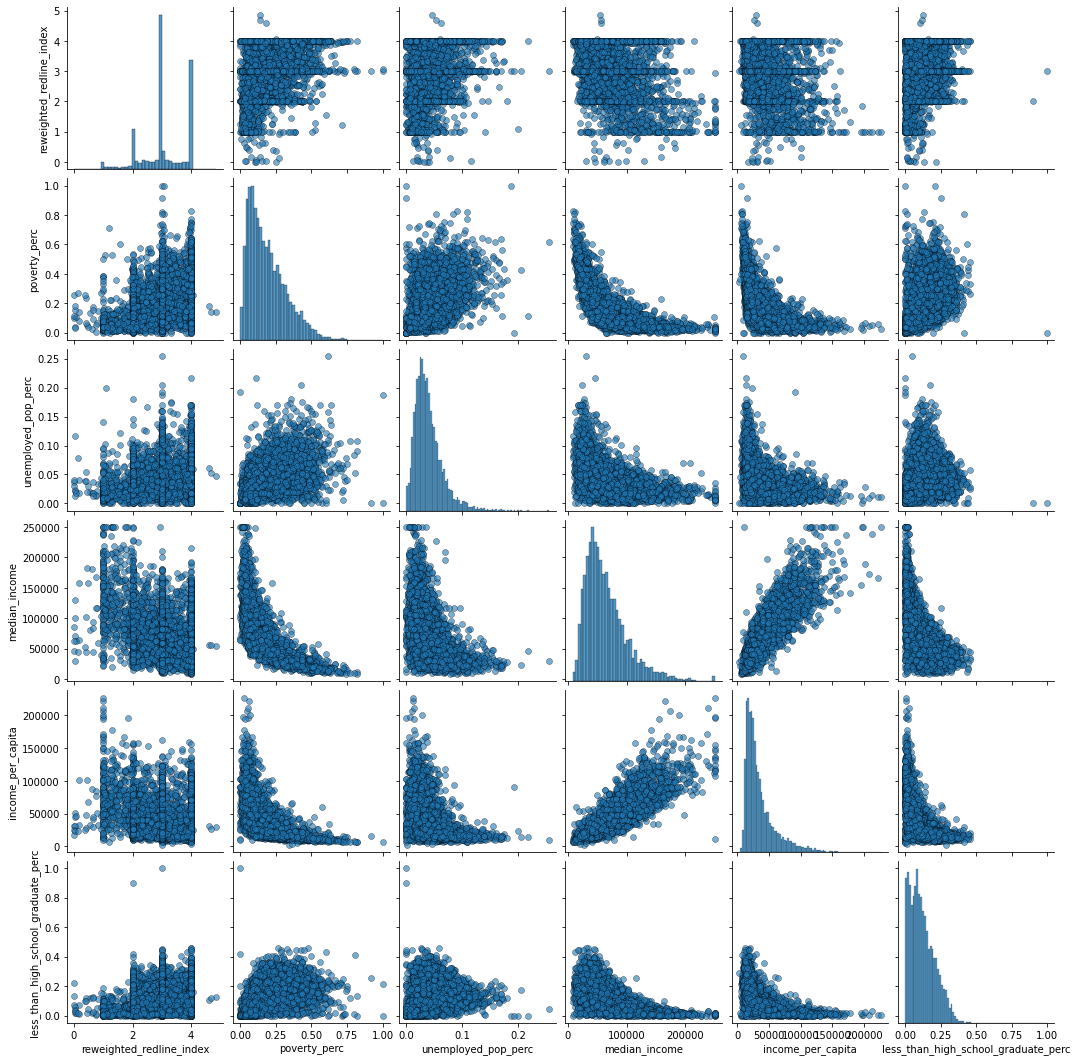

In [ ]:
sns.pairplot(df_ses, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')
plt.savefig("pair-plot-svi-socioeconomic-status.svg")

### Pair Plots for SVI Household Composition & Disability Variables

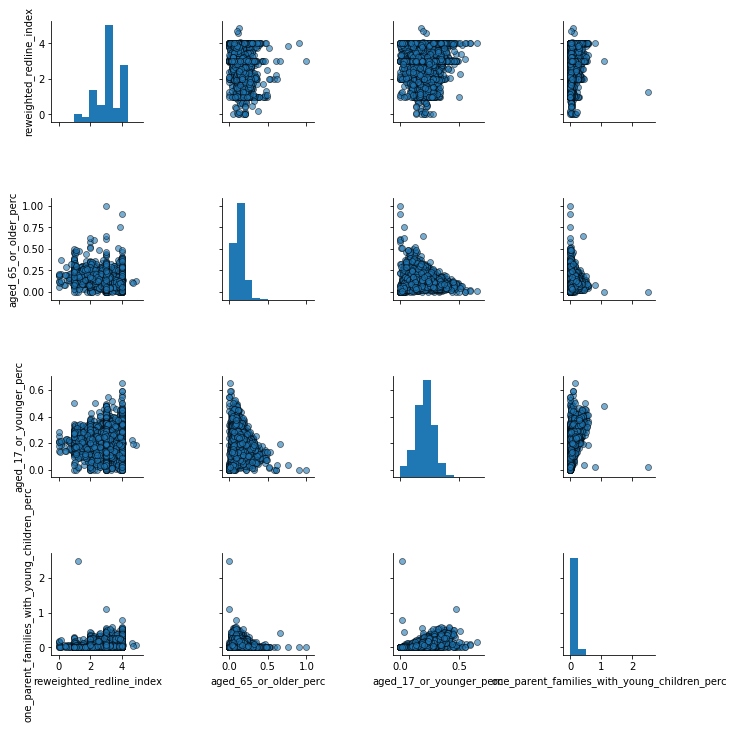

In [ ]:
sns.pairplot(df_hh_composition_disability, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

### Pair Plots for SVI Minority Status Variables
#### (Language variables are not available)

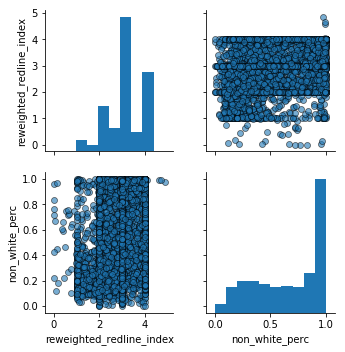

In [ ]:
sns.pairplot(df_minority_status, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

In [ ]:
### Pair Plots for SVI Housing Type & Transportation Variables

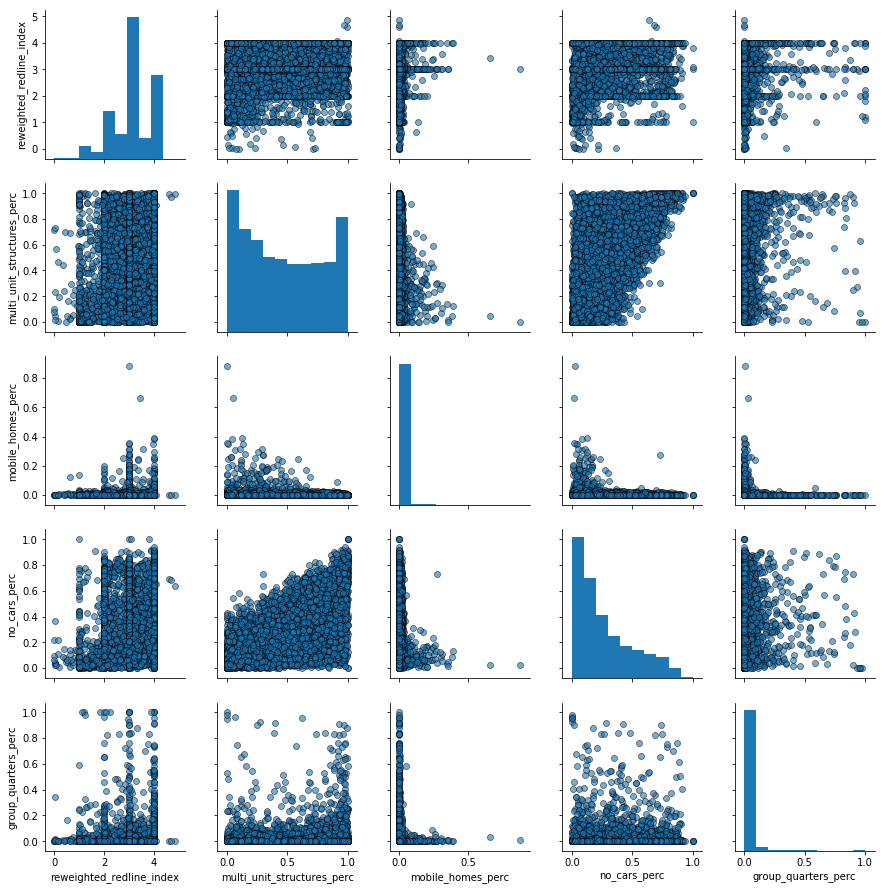

In [ ]:
sns.pairplot(df_housing_transport, plot_kws = {'alpha': 0.6, 'edgecolor': 'black'}, palette = 'winter')

### Correlation between SVI Variables (All)

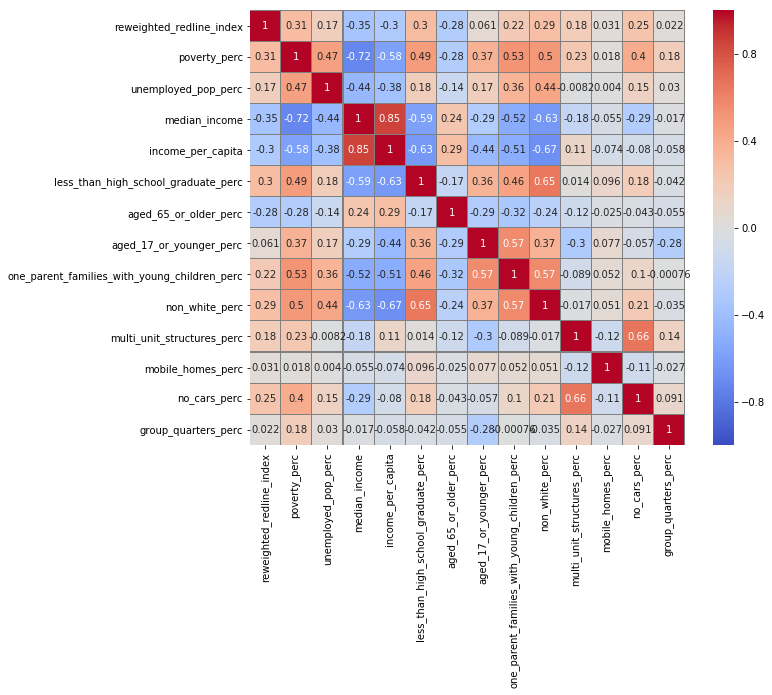

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.astype(float).corr(), linewidth=0.1, linecolor='grey', vmin=-1.0, vmax=1.0, square=True, cmap='coolwarm', annot=True)

### Heat Map for Correlation Coefficients, where p-value < 0.05

In [ ]:
# Define functions to (i) get p-values (to be used to mask out corr coef w p-values >= 0.05); (ii) plot the heat map to show only significant corr coef

from scipy import stats

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=0.1, linecolor='grey',square=True, cbar_kws={'orientation': 'vertical'})

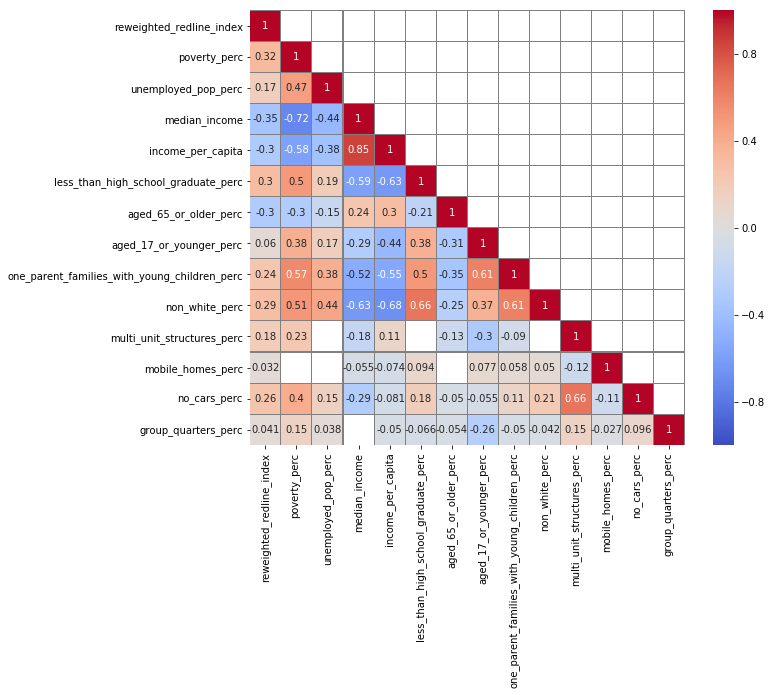

In [ ]:
df.dropna(inplace=True) # Remove missing values, if any

p_values = corr_sig(df.astype(float))  # Convert integer to float before input
mask = np.invert(p_values<0.05)

corr = df.corr()                 # All correlation values between the selected variables
p_values = corr_sig(df)          # p-values for correlation between the selected variables
mask = np.invert(np.tril(p_values<0.05))  # Masking out corr coef w p-values >= 0.05; showing only lower triangle for analysis, as upper triangle is a mirror of the lower

# mask = np.invert(p_values<0.05)         # Un-comment this line to see both triangles (full heat map) 

# Plotting
plot_cor_matrix(corr,mask)  

In [ ]:
# fig = px.box(df, x="reweighted_redline_index")
# fig.show()

### Joint Plots
#### (To select variables of interest)

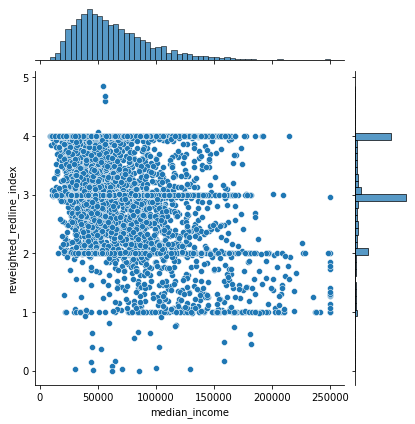

In [ ]:
# Use Jointplot to match up two distplots for bivariate data. Options: scatter, reg, resid, kde, hex
# Using 'scatter'

df1 = df.dropna(subset=['reweighted_redline_index','median_income'])
sns.jointplot(x='median_income',y='reweighted_redline_index',data=df1,kind='scatter')

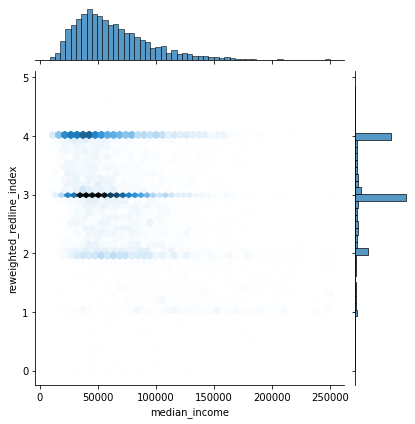

In [ ]:
# Using 'hex' option

sns.jointplot(x='median_income',y='reweighted_redline_index',data=df1,kind='hex')

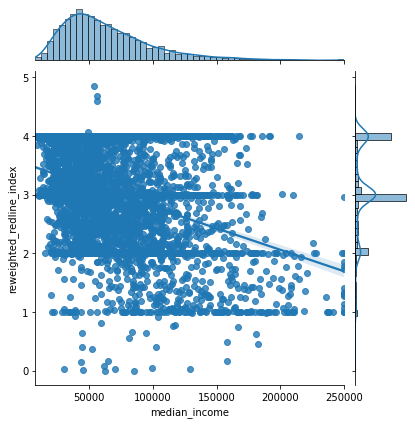

In [ ]:
# Using 'reg' option to visualise regression

sns.jointplot(x='median_income',y='reweighted_redline_index',data=df1,kind='reg')